# (Bay Wheels System Data Analzing)
## by (Nourh Almutairi)

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area.Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.
The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.
> in this project i focus on the first three months of 2020.(January,February, March) and trying to find answrs for some questions.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Preparing Data
> there are three csv files for first quarter of 2020 i will combine them into one csv file.

In [2]:
#read files
jan = pd.read_csv('202001-baywheels-tripdata.csv')
feb = pd.read_csv('202002-baywheels-tripdata.csv')
march = pd.read_csv('202003-baywheels-tripdata.csv')

C:\Users\noura\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#combining
BWdata = pd.concat([jan,feb,march])
#store file
BWdata.to_csv('BWdata.csv')

### What is the structure of your dataset?

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

### What is/are the main feature(s) of interest in your dataset?

> Trip Duration , User Type , Start Station Name,End Station Name

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Bike ID ,  Start Time and Date , End Time and Date

## Assessing Data

>assess data visually and programmatically

In [4]:
BWdata.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


In [5]:
BWdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905007 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             905007 non-null  int64  
 1   start_time               905007 non-null  object 
 2   end_time                 905007 non-null  object 
 3   start_station_id         418705 non-null  float64
 4   start_station_name       419938 non-null  object 
 5   start_station_latitude   905007 non-null  float64
 6   start_station_longitude  905007 non-null  float64
 7   end_station_id           419225 non-null  float64
 8   end_station_name         420499 non-null  object 
 9   end_station_latitude     905007 non-null  float64
 10  end_station_longitude    905007 non-null  float64
 11  bike_id                  905007 non-null  int64  
 12  user_type                905007 non-null  object 
 13  rental_access_method     617858 non-null  object 
dtypes: f

In [6]:
BWdata['rental_access_method'].unique()

array([nan, 'app', 'clipper'], dtype=object)

In [7]:
BWdata['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [8]:
BWdata.isnull().sum(axis = 0)

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           486302
start_station_name         485069
start_station_latitude          0
start_station_longitude         0
end_station_id             485782
end_station_name           484508
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       287149
dtype: int64

> What to do:
* all id's should be string.
* end & start time should be datetime type then seperate each column to 2 columns date and time.
* latitude & longitude i will not use them.
* duration_sec will covnerted to time and change column name.
* delete null values
* creat week day and month column

## Cleaning

### null values cleaning

In [9]:
BWdata_clean = BWdata.copy()

In [10]:
#remove all rows with null values
BWdata_clean = BWdata_clean.dropna(how='any',axis=0) 

In [11]:
#test
BWdata_clean.isnull().sum(axis = 0)

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
rental_access_method       0
dtype: int64

### Start_time & end_time cleaning

In [12]:
#Convert start time and end time to datetime type
BWdata_clean['start_time'] = pd.to_datetime(BWdata_clean['start_time'])
BWdata_clean['end_time'] = pd.to_datetime(BWdata_clean['end_time'])
#test
BWdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58300 entries, 110669 to 174729
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             58300 non-null  int64         
 1   start_time               58300 non-null  datetime64[ns]
 2   end_time                 58300 non-null  datetime64[ns]
 3   start_station_id         58300 non-null  float64       
 4   start_station_name       58300 non-null  object        
 5   start_station_latitude   58300 non-null  float64       
 6   start_station_longitude  58300 non-null  float64       
 7   end_station_id           58300 non-null  float64       
 8   end_station_name         58300 non-null  object        
 9   end_station_latitude     58300 non-null  float64       
 10  end_station_longitude    58300 non-null  float64       
 11  bike_id                  58300 non-null  int64         
 12  user_type                5

In [13]:
#seperate start time to 2 column start time and start date
BWdata_clean['start_date'] = BWdata_clean['start_time'].apply(lambda time: time.strftime('%m-%d-%Y'))
#BWdata_clean['start_time'] = BWdata_clean['start_time'].apply(lambda time: time.strftime('%H:%M'))
BWdata_clean['start_time_hour'] = BWdata_clean['start_time'].dt.hour

In [14]:
#seperate end_time to 2 column end time and end date
BWdata_clean['end_date'] = BWdata_clean['end_time'].apply(lambda time: time.strftime('%m-%d-%Y'))
#BWdata_clean['end_time'] = BWdata_clean['end_time'].apply(lambda time: time.strftime('%H:%M'))
BWdata_clean['end_time_hour'] = BWdata_clean['end_time'].dt.hour

In [15]:
# convert types 
BWdata_clean['end_date'] = pd.to_datetime(BWdata_clean['end_date'])
BWdata_clean['start_date'] = pd.to_datetime(BWdata_clean['start_date'])

In [16]:
BWdata_clean.drop(['start_time', 'end_time'], axis=1, inplace=True)

In [17]:
BWdata_clean.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,start_date,start_time_hour,end_date,end_time_hour
110669,1688,473.0,Willow St at Blewett Ave,37.309014,-121.900011,425.0,Bird Ave at Willow St,37.311284,-121.896325,605133,Subscriber,app,2020-01-19,11,2020-01-19,12
110671,274,473.0,Willow St at Blewett Ave,37.309014,-121.900011,415.0,Delmas Ave at Virginia St,37.319757,-121.892999,885034,Subscriber,app,2020-01-20,19,2020-01-20,19
110674,1671,473.0,Willow St at Blewett Ave,37.309014,-121.900011,425.0,Bird Ave at Willow St,37.311284,-121.896325,533517,Subscriber,app,2020-01-19,11,2020-01-19,12
110675,283,473.0,Willow St at Blewett Ave,37.309014,-121.900011,415.0,Delmas Ave at Virginia St,37.319757,-121.892999,885034,Subscriber,app,2020-01-18,19,2020-01-18,20
110680,1004,473.0,Willow St at Blewett Ave,37.309014,-121.900011,443.0,3rd St at Keyes St,37.320866,-121.876279,342421,Subscriber,app,2020-01-19,15,2020-01-19,15


In [18]:
BWdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58300 entries, 110669 to 174729
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             58300 non-null  int64         
 1   start_station_id         58300 non-null  float64       
 2   start_station_name       58300 non-null  object        
 3   start_station_latitude   58300 non-null  float64       
 4   start_station_longitude  58300 non-null  float64       
 5   end_station_id           58300 non-null  float64       
 6   end_station_name         58300 non-null  object        
 7   end_station_latitude     58300 non-null  float64       
 8   end_station_longitude    58300 non-null  float64       
 9   bike_id                  58300 non-null  int64         
 10  user_type                58300 non-null  object        
 11  rental_access_method     58300 non-null  object        
 12  start_date               5

### all id's cleaning

In [19]:
#convert id's to string
BWdata_clean['start_station_id'] = BWdata_clean['start_station_id'].astype(str)
BWdata_clean['end_station_id'] = BWdata_clean['end_station_id'].astype(str)
BWdata_clean['bike_id'] = BWdata_clean['bike_id'].astype(str)
#test
BWdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58300 entries, 110669 to 174729
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             58300 non-null  int64         
 1   start_station_id         58300 non-null  object        
 2   start_station_name       58300 non-null  object        
 3   start_station_latitude   58300 non-null  float64       
 4   start_station_longitude  58300 non-null  float64       
 5   end_station_id           58300 non-null  object        
 6   end_station_name         58300 non-null  object        
 7   end_station_latitude     58300 non-null  float64       
 8   end_station_longitude    58300 non-null  float64       
 9   bike_id                  58300 non-null  object        
 10  user_type                58300 non-null  object        
 11  rental_access_method     58300 non-null  object        
 12  start_date               5

### latitude & longitude cleaning

In [20]:
#remove uneccary column
BWdata_clean.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude'], axis=1, inplace=True)

In [21]:
#test
BWdata_clean.columns

Index(['duration_sec', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'rental_access_method', 'start_date', 'start_time_hour', 'end_date',
       'end_time_hour'],
      dtype='object')

### duration_sec cleaning

In [22]:
# convert duration_sec to datetime
BWdata_clean['duration_time'] = BWdata_clean['duration_sec'].astype('float64') 
BWdata_clean['duration_time'] = pd.to_datetime(BWdata_clean["duration_time"], unit='s').dt.strftime("%H:%M:%S")

In [23]:
#change name
#BWdata_clean.rename(columns={'duration_sec': 'duration_time'}, inplace=True)
#test
BWdata_clean.head(2)

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,start_date,start_time_hour,end_date,end_time_hour,duration_time
110669,1688,473.0,Willow St at Blewett Ave,425.0,Bird Ave at Willow St,605133,Subscriber,app,2020-01-19,11,2020-01-19,12,00:28:08
110671,274,473.0,Willow St at Blewett Ave,415.0,Delmas Ave at Virginia St,885034,Subscriber,app,2020-01-20,19,2020-01-20,19,00:04:34


In [24]:
BWdata_clean['duration_time'] = pd.to_timedelta(BWdata_clean['duration_time'], unit='s')


In [25]:
BWdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58300 entries, 110669 to 174729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   duration_sec          58300 non-null  int64          
 1   start_station_id      58300 non-null  object         
 2   start_station_name    58300 non-null  object         
 3   end_station_id        58300 non-null  object         
 4   end_station_name      58300 non-null  object         
 5   bike_id               58300 non-null  object         
 6   user_type             58300 non-null  object         
 7   rental_access_method  58300 non-null  object         
 8   start_date            58300 non-null  datetime64[ns] 
 9   start_time_hour       58300 non-null  int64          
 10  end_date              58300 non-null  datetime64[ns] 
 11  end_time_hour         58300 non-null  int64          
 12  duration_time         58300 non-null  timedelta64[ns]


### Creat week day and month column

In [26]:
#creat 2 columns 
BWdata_clean['end_day'] = BWdata_clean['end_date'].dt.day_name()
BWdata_clean['start_day'] = BWdata_clean['start_date'].dt.day_name()

In [27]:
BWdata_clean = BWdata_clean[['bike_id', 'user_type','rental_access_method','duration_sec','duration_time','start_date','end_date','start_time_hour','end_time_hour','start_day','end_day','start_station_id','start_station_name','end_station_id','end_station_name']]

In [28]:
#test
BWdata_clean.head()

,bike_id,user_type,rental_access_method,duration_sec,duration_time,start_date,end_date,start_time_hour,end_time_hour,start_day,end_day,start_station_id,start_station_name,end_station_id,end_station_name
110669,605133,Subscriber,app,1688,00:28:08,2020-01-19,2020-01-19,11,12,Sunday,Sunday,473.0,Willow St at Blewett Ave,425.0,Bird Ave at Willow St
110671,885034,Subscriber,app,274,00:04:34,2020-01-20,2020-01-20,19,19,Monday,Monday,473.0,Willow St at Blewett Ave,415.0,Delmas Ave at Virginia St
110674,533517,Subscriber,app,1671,00:27:51,2020-01-19,2020-01-19,11,12,Sunday,Sunday,473.0,Willow St at Blewett Ave,425.0,Bird Ave at Willow St
110675,885034,Subscriber,app,283,00:04:43,2020-01-18,2020-01-18,19,20,Saturday,Saturday,473.0,Willow St at Blewett Ave,415.0,Delmas Ave at Virginia St
110680,342421,Subscriber,app,1004,00:16:44,2020-01-19,2020-01-19,15,15,Sunday,Sunday,473.0,Willow St at Blewett Ave,443.0,3rd St at Keyes St


In [29]:
#CREAT MONTH COLUMN
BWdata_clean['month'] = pd.DatetimeIndex(BWdata_clean['start_date']).month

In [30]:
#convert month from int to string
import calendar
BWdata_clean['month'] = BWdata_clean['month'].apply(lambda x: calendar.month_abbr[x])

In [31]:
#test
BWdata_clean.head()

,bike_id,user_type,rental_access_method,duration_sec,duration_time,start_date,end_date,start_time_hour,end_time_hour,start_day,end_day,start_station_id,start_station_name,end_station_id,end_station_name,month
110669,605133,Subscriber,app,1688,00:28:08,2020-01-19,2020-01-19,11,12,Sunday,Sunday,473.0,Willow St at Blewett Ave,425.0,Bird Ave at Willow St,Jan
110671,885034,Subscriber,app,274,00:04:34,2020-01-20,2020-01-20,19,19,Monday,Monday,473.0,Willow St at Blewett Ave,415.0,Delmas Ave at Virginia St,Jan
110674,533517,Subscriber,app,1671,00:27:51,2020-01-19,2020-01-19,11,12,Sunday,Sunday,473.0,Willow St at Blewett Ave,425.0,Bird Ave at Willow St,Jan
110675,885034,Subscriber,app,283,00:04:43,2020-01-18,2020-01-18,19,20,Saturday,Saturday,473.0,Willow St at Blewett Ave,415.0,Delmas Ave at Virginia St,Jan
110680,342421,Subscriber,app,1004,00:16:44,2020-01-19,2020-01-19,15,15,Sunday,Sunday,473.0,Willow St at Blewett Ave,443.0,3rd St at Keyes St,Jan


In [33]:
# there is unwanted rows where the month is april , i will remove them
print (BWdata_clean[BWdata_clean["month"] == 'Apr'])

       bike_id   user_type rental_access_method  duration_sec duration_time  \
65471   380635    Customer                  app           374      00:06:14   
66898   757318  Subscriber              clipper           584      00:09:44   
67610   434570  Subscriber              clipper           641      00:10:41   
67641   987679  Subscriber                  app           645      00:10:45   
69649   667173  Subscriber              clipper           107      00:01:47   
...        ...         ...                  ...           ...           ...   
173908  614283  Subscriber                  app           350      00:05:50   
173980  912413  Subscriber                  app           422      00:07:02   
174352  121622  Subscriber                  app           241      00:04:01   
174370  675764  Subscriber                  app          1363      00:22:43   
174641  255850  Subscriber                  app           240      00:04:00   

       start_date   end_date  start_time_hour  end_

In [34]:
BWdata_clean.drop(BWdata_clean[BWdata_clean.month == 'Apr'].index, inplace=True)

## Univariate Exploration
### User Type

#### who is the most used of ford GoBike system (Subscriber vs Customers)

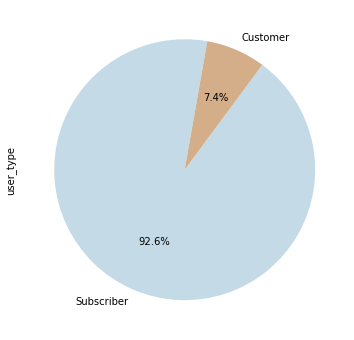

In [35]:
plt.figure(figsize=(10,6))
BWdata_clean.user_type.value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=80 , colors = ['#c4dbe7', '#d3ae88'])

> it semes there is a clear deiffrence between Subscriber and Customers in their number
Subscribers are more than customers by 92%.

### Rental Access Method

#### what is the most used method (App vs Clipper)

In [36]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

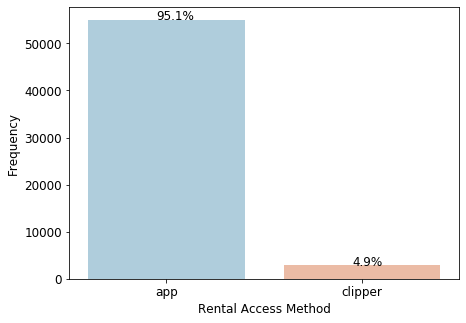

In [37]:
plt.figure(figsize=(7,5))
ax=sb.countplot('rental_access_method',data=BWdata_clean,palette = "RdBu_r")
plt.xticks(size=12)
plt.xlabel('Rental Access Method', size = 12)
plt.yticks(size=12)
plt.ylabel('Frequency', size = 12)
without_hue( ax ,BWdata_clean.rental_access_method)

> Few users are using clipper they are only 5%  while 95% of users using app as rental access method.

### Start station and End Station name
#### What is the Top 5 in each

In [38]:
BWdata_clean.start_station_name.value_counts()

Berry St at 4th St                                    1409
San Francisco Caltrain (Townsend St at 4th St)        1284
Market St at 10th St                                  1250
Howard St at Beale St                                 1103
San Francisco Ferry Building (Harry Bridges Plaza)    1060
                                                      ... 
Egbert Ave at Jennings St                                2
Sonora Ave at 1st St                                     2
Columbia Ave at Bird Ave                                 1
Evans Ave at Mendell St                                  1
Locust St at Grant St                                    1
Name: start_station_name, Length: 309, dtype: int64

In [39]:
top5_start_stations = BWdata_clean['start_station_name'].value_counts()[:5]
top5_start_stations

Berry St at 4th St                                    1409
San Francisco Caltrain (Townsend St at 4th St)        1284
Market St at 10th St                                  1250
Howard St at Beale St                                 1103
San Francisco Ferry Building (Harry Bridges Plaza)    1060
Name: start_station_name, dtype: int64

Text(0.5, 0, 'Frequency')

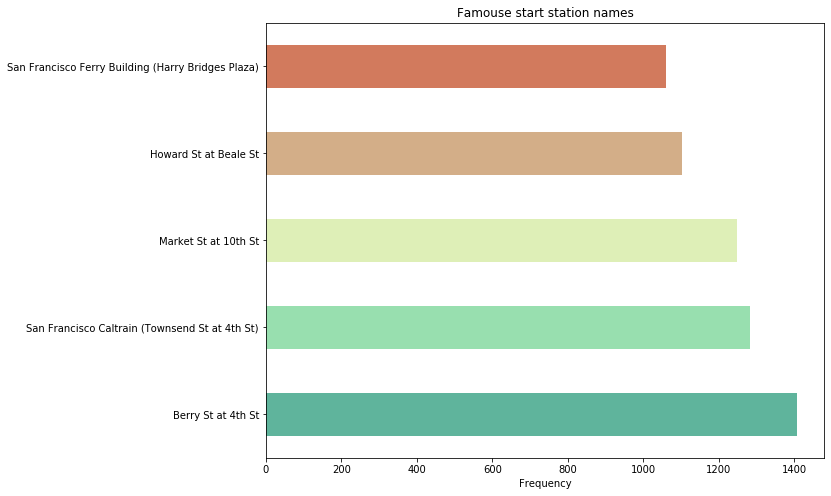

In [40]:
BWdata_clean.start_station_name.value_counts()[0:5].plot(kind='barh', figsize=(10,8), title='Famouse start station names',color=['#5fb49c', '#98dfaf', '#deefb7', '#d3ae88', '#d27a5d']).set_xlabel("Frequency")


> we can see "Berry St at 4th St" taken the 1st as famous start station 

In [41]:
BWdata_clean.end_station_name.value_counts()

San Francisco Caltrain (Townsend St at 4th St)        1947
Berry St at 4th St                                    1344
Market St at 10th St                                  1165
San Francisco Ferry Building (Harry Bridges Plaza)    1147
Montgomery St BART Station (Market St at 2nd St)      1060
                                                      ... 
Locust St at Grant St                                    3
1st St at Younger Ave                                    2
23rd St at Taylor St                                     2
DeFremery Park                                           1
7th St at Empire St                                      1
Name: end_station_name, Length: 314, dtype: int64

In [42]:
top5_end_stations = BWdata_clean['end_station_name'].value_counts()[:5]
top5_end_stations

San Francisco Caltrain (Townsend St at 4th St)        1947
Berry St at 4th St                                    1344
Market St at 10th St                                  1165
San Francisco Ferry Building (Harry Bridges Plaza)    1147
Montgomery St BART Station (Market St at 2nd St)      1060
Name: end_station_name, dtype: int64

Text(0.5, 0, 'Frequency')

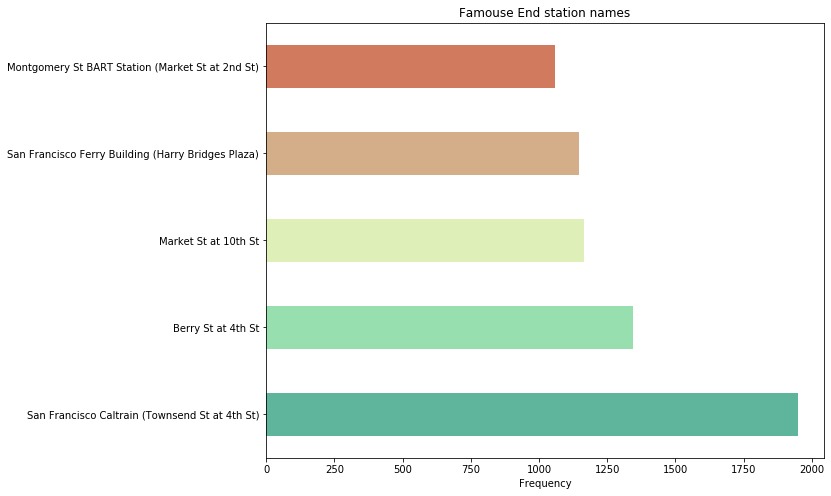

In [43]:
BWdata_clean.end_station_name.value_counts()[0:5].plot(kind='barh', figsize=(10,8), title='Famouse End station names',color=['#5fb49c', '#98dfaf', '#deefb7', '#d3ae88', '#d27a5d']).set_xlabel("Frequency")


>San Francisco Caltrain (Townsend St at 4th St) takes 1st as famouse end station

### Duration Time

In [44]:
BWdata_clean.duration_time.value_counts()

00:06:02    95
00:06:52    93
00:07:03    93
00:06:30    91
00:06:07    90
            ..
00:30:19     1
01:19:40     1
00:38:51     1
01:53:50     1
01:10:43     1
Name: duration_time, Length: 3571, dtype: int64

In [45]:
BWdata_clean['duration_time'].max()

Timedelta('0 days 08:11:46')

In [52]:
BWdata_clean['duration_time'].min()

Timedelta('0 days 00:01:00')

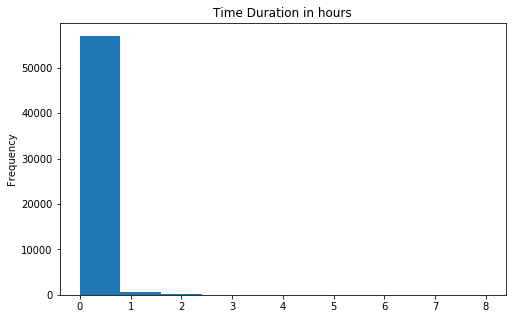

In [46]:
plt.figure(figsize=(8,5))

BWdata_clean['duration_time'].astype('timedelta64[h]').plot.hist(title = 'Time Duration in hours')

> Most of bikes trips duration are less than 1 hour.

### Which day user being more active 

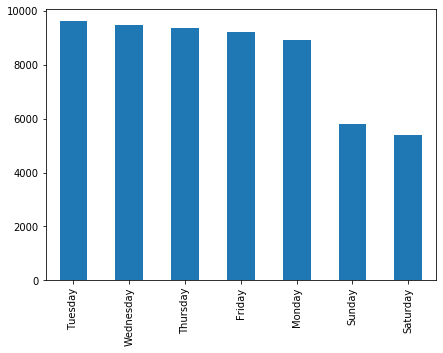

In [47]:
plt.figure(figsize=(7,5))
BWdata_clean['start_day'].value_counts().plot(kind='bar')

> the bar shows the more users usualy active in wednesday while sunday and saturday are less users .

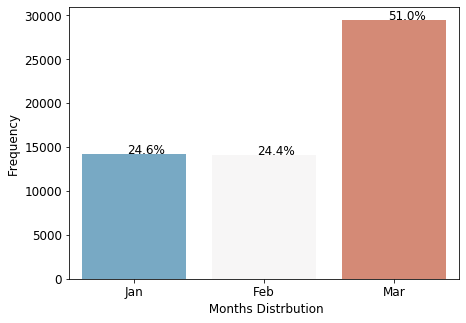

In [48]:
plt.figure(figsize=(7,5))
ax=sb.countplot('month',data=BWdata_clean,palette = "RdBu_r")
plt.xticks(size=12)
plt.xlabel(' Months Distrbution', size = 12)
plt.yticks(size=12)
plt.ylabel('Frequency', size = 12)
without_hue( ax ,BWdata_clean.month)

>User are more active in march while in jan and feb user activity less than march by 27%

### Which time users usualy start bikes trips

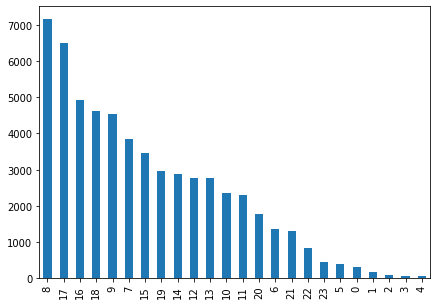

In [49]:
plt.figure(figsize=(7,5))
BWdata_clean['start_time_hour'].value_counts().plot(kind='bar')

> most usrs usualy start bikes at 8 am "morning"

## Bivariate Exploration


### Relationship between trip duration and week day .

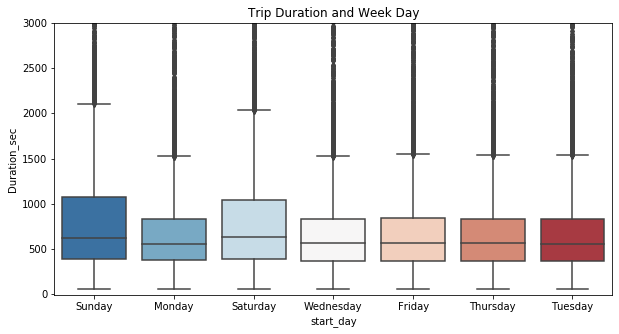

In [50]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = BWdata_clean, x = 'start_day', y = 'duration_sec', palette = "RdBu_r")
plt.ylim([-10, 3000])
plt.title('Trip Duration and Week Day')
plt.ylabel('Duration_sec')
plt.show()


> while the graph before this one show " the users usualy active in wednesday while sunday and saturday are less active" however this graph shows the trip durations are more in sunday and saturday

### Relashionship between user type and trip duration

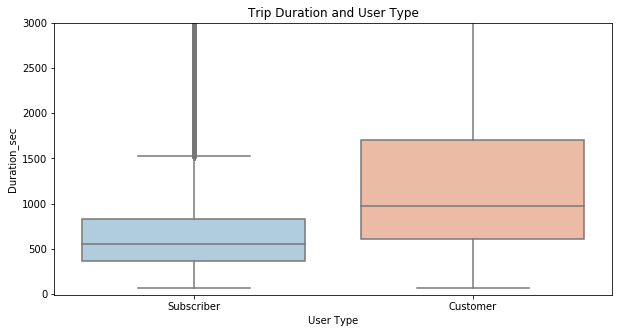

In [51]:

plt.figure(figsize = [10, 5])
sb.boxplot(data = BWdata_clean, x = 'user_type', y = 'duration_sec', palette = "RdBu_r")
plt.ylim([-10, 3000])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()


>An important note here is that customers are taking more trip duration than subscribers 

###  week day and month distrbution

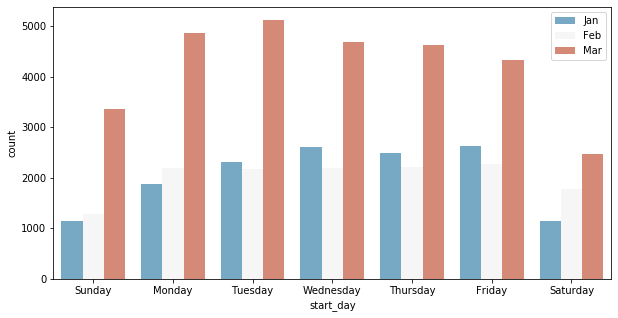

In [60]:
plt.figure(figsize = [10, 5])
cat1_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
cat2_order = ['Jan', 'Feb', 'Mar']
sb.countplot(data = BWdata_clean, x = 'start_day', hue = 'month',order = cat1_order, hue_order = cat2_order,palette = "RdBu_r")
plt.legend()

### Relashionship between start time and week day

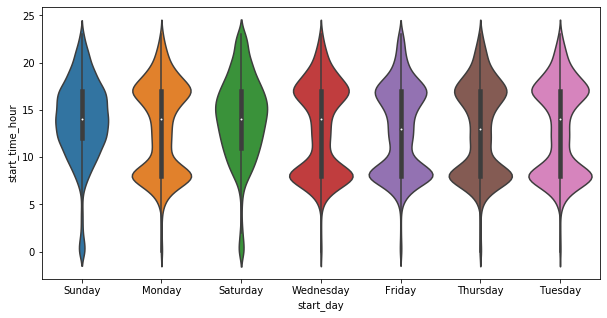

In [54]:
plt.figure(figsize = [10, 5])
sb.violinplot(data = BWdata_clean, x = 'start_day', y = 'start_time_hour')

> this figure shows users usualy in sunday and saturday are more active from 8 am to 17 pm while others days they are less active from 10 am to 15 pm.

### Relashionship between start time and duration time

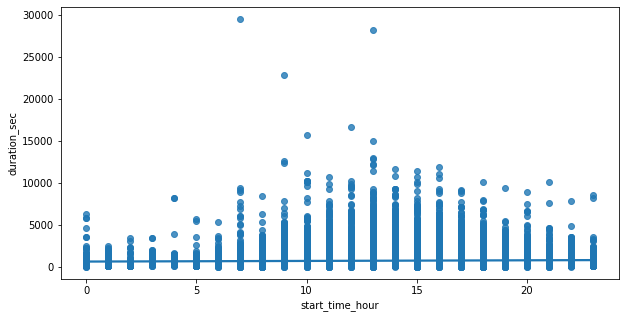

In [55]:
plt.figure(figsize = [10, 5])
sb.regplot(x='start_time_hour',y='duration_sec',data=BWdata_clean, fit_reg=True) 

> the figure shows users usualy takes long trips from (7 am  to 17 pm)

## Multivariate Exploration


<Figure size 720x360 with 0 Axes>

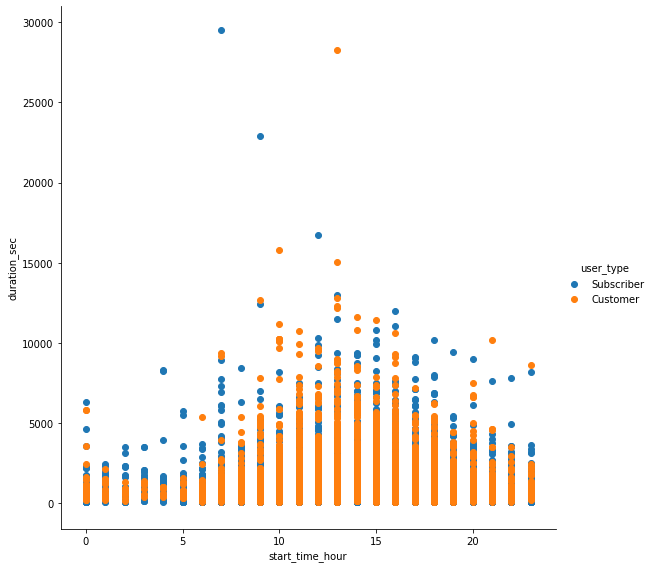

In [56]:
plt.figure(figsize = [10, 5])
g = sb.FacetGrid(data = BWdata_clean, hue = 'user_type', height = 8)
g.map(plt.scatter, 'start_time_hour', 'duration_sec')
g.add_legend()

<Figure size 720x360 with 0 Axes>

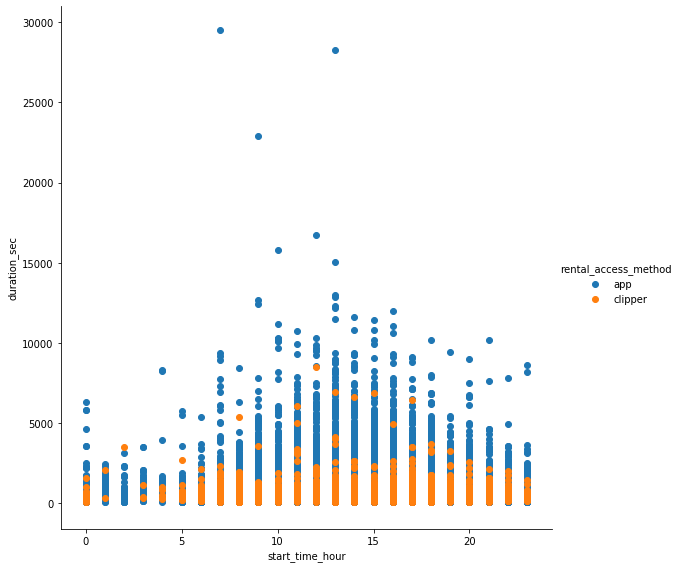

In [74]:
plt.figure(figsize = [10, 5])
g = sb.FacetGrid(data = BWdata_clean, hue = 'rental_access_method', height = 8)
g.map(plt.scatter, 'start_time_hour', 'duration_sec')
g.add_legend()

>there is no diffrence in start time for both users whos using app or clipper , but users who use app take long trip time

### User types by month

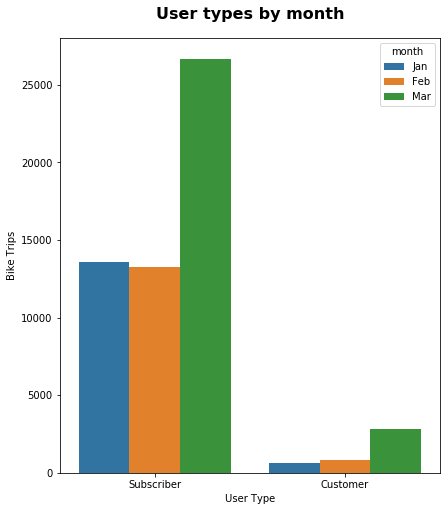

In [58]:
plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
g = sb.countplot(data=BWdata_clean, x="user_type", hue="month", order=BWdata_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Bike Trips')
g.set_title('User types by month', y=1.03, fontsize=16, fontweight='semibold');

In [72]:
### Famouse start & end station by month

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

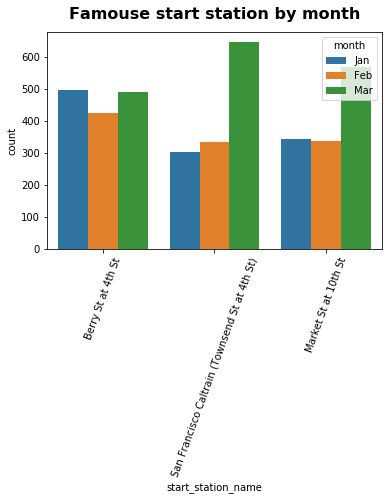

In [74]:
g = sb.countplot(data=BWdata_clean, x="start_station_name", hue="month", order=BWdata_clean.start_station_name.value_counts()[0:3].index)
g.set_title('Famouse start station by month', y=1.03, fontsize=16, fontweight='semibold');
plt.xticks(rotation=70)

> in march San francisco Caltrain is the 1st famouse start staion then Market St at 10th St at last Berry St at 4th St.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

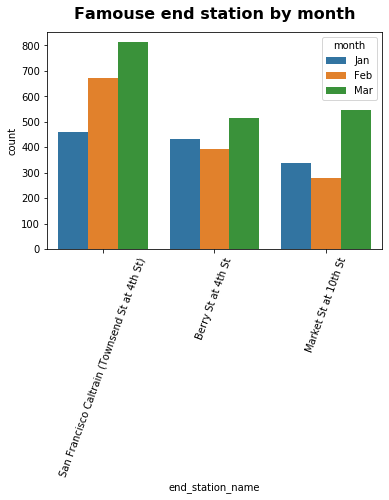

In [75]:
g = sb.countplot(data=BWdata_clean, x="end_station_name", hue="month", order=BWdata_clean.end_station_name.value_counts()[0:3].index)
g.set_title('Famouse end station by month', y=1.03, fontsize=16, fontweight='semibold');
plt.xticks(rotation=70)

> While San Franciso is 1st famouse start staution in march it also 1st famouse end station in same month

## Summary:

>
* Subscribers are more than customers by 92% 
* Few users are using clipper they are only 5% while 95% of users using app as rental access method.
* Berry St at 4th St" taken the 1st as famous start station
* San Francisco Caltrain (Townsend St at 4th St) takes 1st as famouse end station
* Maximum duration is:0 days 08:11:46'.
* Minmum duration is:0 days 00:01:00.
* Most of bikes trips duration are less than 1 hour.
* Users usualy active in wednesday while sunday and saturday are less users. however,the users usualy active in wednesday while Sunday and saturday are less active" however this graph shows the trip durations are more in sunday and saturday.

> 
* User are more active in march while in jan and feb user activity less than march by 27%
* Most usrs usualy start bikes at 8 am "morning".
* Customers are taking more trip duration than subscribers.
* Users usualy in sunday and saturday are more active from 8 am to 17 pm while others days they are less active from 10 am to 15 pm.
* Users usualy takes long trips from (7 am to 17 pm)
* There is no diffrence in start time for both users whos using app or clipper , but users who use app take long trip time
* In march San francisco Caltrain is the 1st famouse start staion then Market St at 10th St at last Berry St at 4th St.
* While San Franciso is 1st famouse start staution in march it also 1st famouse end station in same month